In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.383641,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.513239,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.539893,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.443220,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3803,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3804,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3805,ZWILCH,0.000030,0.775549,1.843545,0.101584,1.843545
3806,ZWINT,0.001874,0.854401,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [25]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [26]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [27]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [28]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
0,KEGG,KEGG:01100,Metabolic pathways,5.791821e-17,True,Metabolic pathways,1291,3746,496,13575,0.132408,0.384198,query_1,[KEGG:00000],"[AASS, ABAT, ACAA2, ACACA, ACAD8, ACADL, ACADM...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
1,KEGG,KEGG:01240,Biosynthesis of cofactors,1.041344e-07,True,Biosynthesis of cofactors,138,3746,72,13575,0.019221,0.521739,query_1,[KEGG:00000],"[ADSL, ADSS, AK1, AK2, AK3, AK4, AK6, ALAD, AL...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
2,KEGG,KEGG:00240,Pyrimidine metabolism,1.637848e-07,True,Pyrimidine metabolism,51,3746,35,13575,0.009343,0.686275,query_1,[KEGG:00000],"[CAD, CANT1, CMPK1, CMPK2, CTPS1, CTPS2, DCK, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
3,KEGG,KEGG:01200,Carbon metabolism,3.599628e-07,True,Carbon metabolism,113,3746,61,13575,0.016284,0.539823,query_1,[KEGG:00000],"[ACADS, ACAT1, ACOX3, ACSS1, ACSS2, ALDH6A1, A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
4,KEGG,KEGG:00970,Aminoacyl-tRNA biosynthesis,3.302215e-05,True,Aminoacyl-tRNA biosynthesis,28,3746,21,13575,0.005606,0.750000,query_1,[KEGG:00000],"[AARS2, CARS, DARS2, EARS2, FARS2, HARS2, IARS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,KEGG,KEGG:05230,Central carbon metabolism in cancer,5.500946e-03,True,Central carbon metabolism in cancer,66,903,15,13575,0.016611,0.227273,query_1,[KEGG:00000],"[SLC7A5, SLC1A5, LDHA, MAP2K1, MET, GLS, PGAM1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
5,KEGG,KEGG:01200,Carbon metabolism,6.800201e-03,True,Carbon metabolism,113,1034,22,13575,0.021277,0.194690,query_1,[KEGG:00000],"[RPIA, GPT2, PGK1, PSPH, TALDO1, RPE, GCSH, GL...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
6,KEGG,KEGG:00520,Amino sugar and nucleotide sugar metabolism,9.163683e-03,True,Amino sugar and nucleotide sugar metabolism,44,937,12,13575,0.012807,0.272727,query_1,[KEGG:00000],"[UGDH, UAP1, GFPT1, UXS1, NANP, GFPT2, GNPNAT1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
7,KEGG,KEGG:00051,Fructose and mannose metabolism,1.415022e-02,True,Fructose and mannose metabolism,32,1034,10,13575,0.009671,0.312500,query_1,[KEGG:00000],"[PMM2, TKFC, AKR1B10, GMDS, PFKP, PFKL, SORD, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated


In [29]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

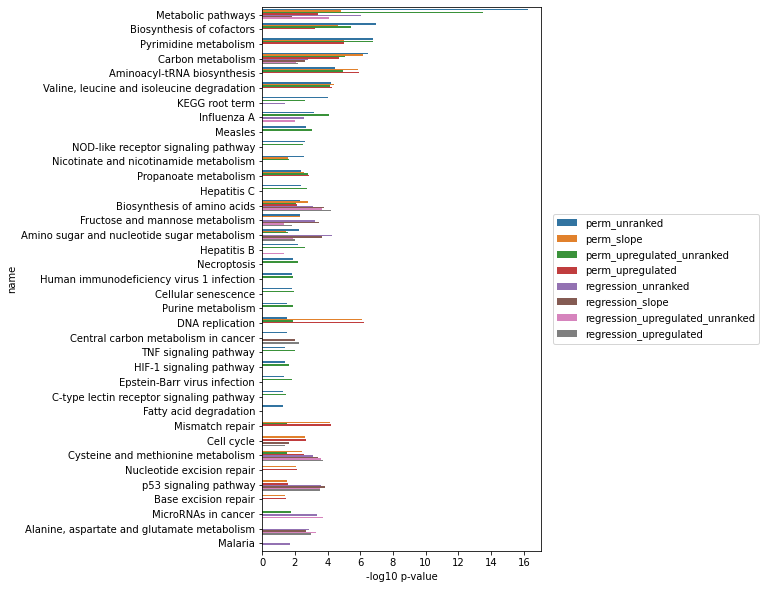

In [30]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [31]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [32]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
2,"{perm_upregulated, regression_upregulated, perm_upregulated_unranked, regression_upregulated_unranked, regression_unranked, perm_slope, perm_unranked, regression_slope}","{Biosynthesis of amino acids, Carbon metabolism}",1.000
0,"{perm_upregulated, perm_upregulated_unranked, regression_upregulated_unranked, regression_unranked, perm_slope, perm_unranked, regression_slope}",{Metabolic pathways},0.875
8,"{regression_upregulated, perm_upregulated_unranked, regression_upregulated_unranked, regression_unranked, perm_slope, perm_unranked, regression_slope}",{Amino sugar and nucleotide sugar metabolism},0.875
14,"{perm_upregulated, regression_upregulated, perm_upregulated_unranked, regression_upregulated_unranked, regression_unranked, perm_slope, regression_slope}",{Cysteine and methionine metabolism},0.875
16,"{perm_upregulated, regression_upregulated, regression_upregulated_unranked, regression_unranked, perm_slope, regression_slope}",{p53 signaling pathway},0.750
7,"{regression_upregulated, regression_upregulated_unranked, regression_unranked, perm_slope, perm_unranked, regression_slope}",{Fructose and mannose metabolism},0.750
18,"{regression_unranked, regression_upregulated_unranked, regression_upregulated, regression_slope}","{Alanine, aspartate and glutamate metabolism}",0.500
4,"{perm_upregulated_unranked, regression_upregulated_unranked, regression_unranked, perm_unranked}",{Influenza A},0.500
1,"{perm_slope, perm_upregulated_unranked, perm_upregulated, perm_unranked}","{Propanoate metabolism, DNA replication, Valine, leucine and isoleucine degradation, Biosynthesis of cofactors, Pyrimidine metabolism, Aminoacyl-tRNA biosynthesis}",0.500
13,"{perm_slope, perm_upregulated, regression_upregulated, regression_slope}",{Cell cycle},0.500


In [34]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,Biosynthesis of amino acids,1.000
1,Carbon metabolism,1.000
2,Metabolic pathways,0.875
3,Amino sugar and nucleotide sugar metabolism,0.875
4,Cysteine and methionine metabolism,0.875
5,p53 signaling pathway,0.750
6,Fructose and mannose metabolism,0.750
7,"Alanine, aspartate and glutamate metabolism",0.500
8,Influenza A,0.500
9,Propanoate metabolism,0.500


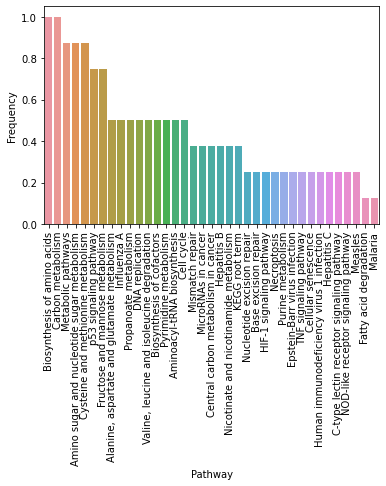

In [35]:
axes = sns.barplot(data = upregulated_pathways_df, x = 'Pathway', y = 'Frequency')
axes.tick_params(axis = 'x', labelrotation = 90)

In [36]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [37]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
4,"{regression_downregulated_unranked, regression_unranked, regression_downregulated, perm_slope, perm_unranked, regression_slope}",{Amino sugar and nucleotide sugar metabolism},0.750
0,"{perm_slope, regression_unranked, perm_unranked, regression_slope}","{Fructose and mannose metabolism, Biosynthesis of amino acids, Metabolic pathways, Carbon metabolism}",0.500
8,"{perm_slope, regression_unranked, regression_slope}","{p53 signaling pathway, Cysteine and methionine metabolism}",0.375
15,"{regression_unranked, regression_downregulated_unranked, regression_downregulated}",{Malaria},0.375
16,"{regression_downregulated_unranked, regression_downregulated}",{Glycolysis / Gluconeogenesis},0.250
14,"{regression_unranked, regression_slope}","{Alanine, aspartate and glutamate metabolism}",0.250
11,"{perm_downregulated, regression_downregulated}","{Cholesterol metabolism, Phagosome}",0.250
1,"{perm_slope, perm_unranked}","{Propanoate metabolism, DNA replication, Valine, leucine and isoleucine degradation, Nicotinate and nicotinamide metabolism, Biosynthesis of cofactors, Pyrimidine metabolism, Aminoacyl-tRNA biosynthesis}",0.250
9,"{perm_downregulated, perm_downregulated_unranked}",{Hematopoietic cell lineage},0.250
7,"{perm_slope, regression_slope}",{Cell cycle},0.250
